# Check rates of fire

In [1]:
import numpy as np
import matplotlib.pylab as plt

import itertools
import pandas as pd

import sys
sys.path.append('../src/')
import simulate_gillespie
import Hypergraphs

from scipy.special import comb

In [2]:
N = 100

beta1 = 2 / N       # pairwise infection rate
beta2 = 4 / (N**2)  # hyperedge contagion rate
mu    = 1           # recovery rate

I0 = 10         # number of initial infected
time_max = 10   # maximum time duration

g = Hypergraphs.CompleteHypergraph(N)
g.print()

initial_infections = list(range(I0)) # which nodes are infected at t=0

	Complete hypergraph on 100 nodes with 166650 edges.



## Theoretical rates

In [3]:
k_values = np.arange(0, N + 1) # number of infected from 0 to N

k_choose_2 = np.array(list(map(lambda k: comb(k, 2, exact=True), k_values)))

# without rates beta1, beta2, mu:
a_k = k_values * (N - k_values)
b_k = k_choose_2 * (N - k_values)
c_k = k_values

## Simulated total counts

In [4]:
X_t = simulate_gillespie.gillespie_sim(g, beta1, beta2, mu, initial_infections, time_max)

exited while loop: time=10.00475829350521, time_to_event=0.021705264675423316


In [5]:
len(X_t[0])

1306

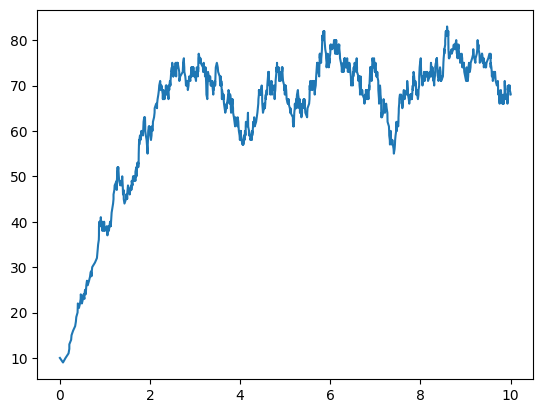

In [6]:
plt.plot(X_t[0], X_t[2])

In [7]:
# Outputs: X_t = [time, time_to_event, total_infected, event_type, total_pw, total_ho]
df = pd.DataFrame({
    'time': X_t[0], 
    'time_to_event': X_t[1],
    'total_infected': X_t[2],
    'event_type': X_t[3],
    'total_pw': X_t[4],
    'total_ho': X_t[5],
})
df.head()

,time,time_to_event,total_infected,event_type,total_pw,total_ho
0,0,None,10,None,900,4050
1,0.068945,0.068945,9,RC,819,3276
2,0.125256,0.056312,10,PW,900,4050
3,0.191729,0.066473,11,PW,979,4895
4,0.209398,0.017669,12,PW,1056,5808


In [8]:
df.tail()

,time,time_to_event,total_infected,event_type,total_pw,total_ho
1301,9.963164,0.002562,69,RC,2139,72726
1302,9.980626,0.017462,70,HO,2100,72450
1303,9.983053,0.002427,69,RC,2139,72726
1304,10.004758,0.021705,68,RC,2176,72896
1305,10,0.021705,68,None,None,None


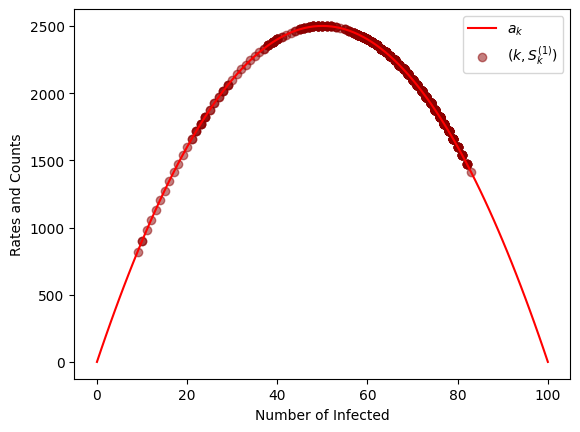

In [9]:
fig = plt.figure()
ax = plt.subplot()

# theoretical rates
ax.plot(k_values, a_k, label=r'$a_k$', color="red")

# (tot_inf, tot_pw)
ax.scatter(df["total_infected"], df["total_pw"],
           label=r'$(k, S_{k}^{(1)})$', color="darkred", alpha=0.5)

plt.xlabel("Number of Infected")
plt.ylabel("Rates and Counts")

plt.legend()
plt.show()

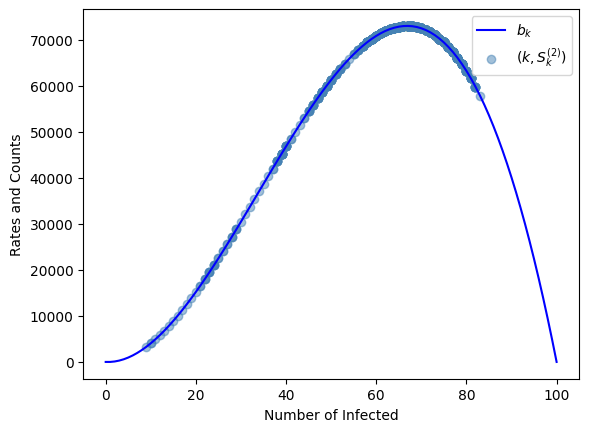

In [10]:
fig = plt.figure()
ax = plt.subplot()

# theoretical rates
ax.plot(k_values, b_k, label=r'$b_k$', color="blue")

# (tot_inf, tot_pw)
ax.scatter(df["total_infected"], df["total_ho"],
           label=r'$(k, S_{k}^{(2)})$', color="steelblue", alpha=0.5)

plt.xlabel("Number of Infected")
plt.ylabel("Rates and Counts")

plt.legend()
plt.show()